In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [31]:
class Reality:
    def __init__(self, num_action=2):
        self.num_action = num_action
        self.cum_loss = np.zeros((num_action,))
    
    def next_loss(self, action=None):
        new_loss = np.random.random(self.num_action)
        self.cum_loss += new_loss
        return new_loss
    
    def best_loss(self):
        return np.min(self.cum_loss)
    
class AdversaryReality(Reality):
    def __init__(self, num_action=2):
        Reality.__init__(self, num_action)
    
    def next_loss(self, prob=None):
        if prob is not None:
            new_loss = prob.copy()
            self.cum_loss += new_loss
            return new_loss
        else:
            Reality.next_loss(self, action=None)

class SwapReality(Reality):
    def __init__(self, num_action=2):
        Reality.__init__(self, num_action)
        self.counter = 0
        
    def next_loss(self, prob=None):
        self.counter += 1
        new_loss = np.ones(self.num_action)
        new_loss[(self.counter // 1000) % self.num_action] = 0.0
        self.cum_loss += new_loss
        return new_loss
    
adversary = AdversaryReality(num_action=3)
for i in range(2):
    print(adversary.next_loss(None))
print(adversary.best_loss())

None
None
0.761196100173


In [37]:
class ExpAgent:
    def __init__(self, num_action=2, eta=0.1):
        self.log_weight = np.ones((num_action,))
        self.eta = 0.1
        self.num_action = num_action
        self.cur_action = None
        self.cum_loss = 0.0
        
    def update(self, loss):
        self.log_weight += np.log(1 - self.eta * loss)
        self.cum_loss += loss[int(self.cur_action)]
        self.log_weight *= 1.0
        
    def next_action(self):
        prob = np.exp(self.log_weight - np.max(self.log_weight))
        prob /= np.sum(prob)
        self.cur_action = np.random.choice(range(self.num_action), p=prob)
        return self.cur_action, prob

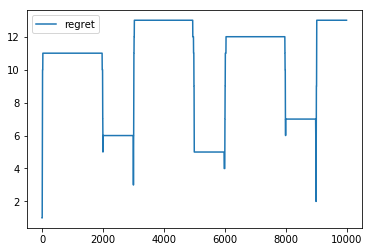

In [38]:
adversary = SwapReality(num_action=3)
agent = ExpAgent(num_action=3)

best_losses, agent_losses = [], []

for i in range(10000):
    action, prob = agent.next_action()
    loss = adversary.next_loss(prob)
    agent.update(loss)

    best_losses.append(adversary.best_loss())
    agent_losses.append(agent.cum_loss)

regret = np.array(agent_losses) - np.array(best_losses)
plt.plot(regret, label='regret')
plt.legend()
plt.show()
